In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def setup_compact_jupyter():
    """Configure plotting for compact Jupyter output in VSCode"""
    # Very compact figure size
    plt.rcParams['figure.figsize'] = [4, 2.5]

    # Smaller font sizes
    plt.rcParams['font.size'] = 8
    plt.rcParams['axes.titlesize'] = 9
    plt.rcParams['axes.labelsize'] = 8
    plt.rcParams['xtick.labelsize'] = 7
    plt.rcParams['ytick.labelsize'] = 7
    plt.rcParams['legend.fontsize'] = 7

    # Adjust margins and spacing
    plt.rcParams['figure.constrained_layout.use'] = True
    plt.rcParams['figure.dpi'] = 80
    plt.rcParams['savefig.dpi'] = 150

    # Configure seaborn for compact display
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=0.7)

    # Pandas display options for compact output
    pd.set_option('display.max_rows', 20)
    pd.set_option('display.max_columns', 8)
    pd.set_option('display.precision', 3)

    # Numpy print options
    np.set_printoptions(precision=3, suppress=True, threshold=50)

# Run this at the start of your session
setup_compact_jupyter()

# Optional: Function to create even smaller plots when needed
def create_small_plot(width=3, height=2):
    """Create a figure with very small dimensions"""
    return plt.subplots(figsize=(width, height), dpi=80)

In [3]:
# Read the CSV file
df = pd.read_csv('all_clustering_results.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-----------------")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Display unique methods and datasets
print("\nUnique Methods:", df['Method'].unique())
print("Unique Datasets:", df['Dataset'].unique())

Dataset Overview:
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Dataset                                     25 non-null     object 
 1   Method                                      25 non-null     object 
 2   Success_Rate                                25 non-null     float64
 3   Final_Score                                 25 non-null     float64
 4   Rank                                        25 non-null     float64
 5   silhouette_mean                             25 non-null     float64
 6   silhouette_mean_penalized                   25 non-null     float64
 7   silhouette_percentile_75                    25 non-null     float64
 8   silhouette_percentile_75_penalized          25 non-null     float64
 9   silhouette_max                              25 non-nu

C:\Users\shiva\AppData\Local\Temp\ipykernel_10756\3126235538.py:19: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '#2c3e50'}` instead.

  bars = sns.barplot(
C:\Users\shiva\AppData\Local\Temp\ipykernel_10756\3126235538.py:19: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bars = sns.barplot(


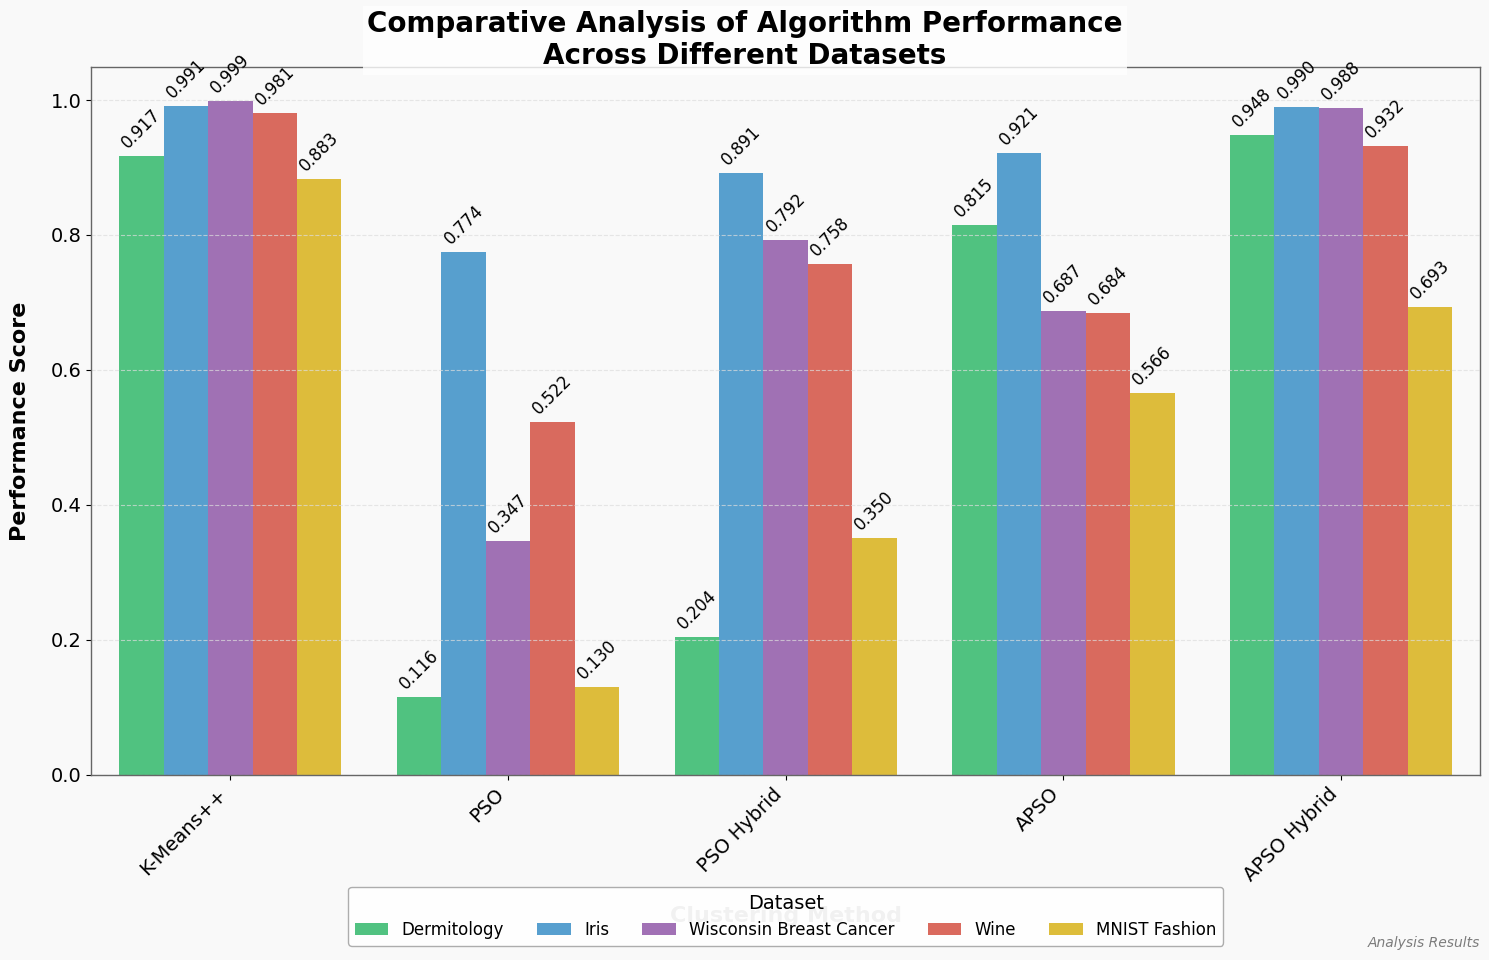


Detailed Performance Statistics:
             Mean Score  Std Dev  CV (%)
Method                                  
K-Means++         0.954    0.051    5.36
APSO Hybrid       0.910    0.124   13.61
APSO              0.735    0.137   18.58
PSO Hybrid        0.599    0.302   50.44
PSO               0.378    0.278   73.54

Performance Summary:
Best Method: K-Means++ (Score: 0.9541)
Performance Range: 0.3779 - 0.9541
Average Performance Across All Methods: 0.7152


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color configurations
plt.style.use('default')
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
background_color = '#f9f9f9'
grid_color = '#dddddd'

# Create the figure with higher resolution and custom background
plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create the enhanced bar plot
bars = sns.barplot(
    data=df,
    x='Method',
    y='Final_Score',
    hue='Dataset',
    palette=colors,
    saturation=0.8,
    errwidth=1,
    capsize=0.1,
    errcolor='#2c3e50',
    alpha=0.9
)

# Customize the plot
plt.title('Comparative Analysis of Algorithm Performance\nAcross Different Datasets',
          fontsize=20,
          pad=20,
          fontweight='bold',
          fontfamily='sans-serif')

plt.xlabel('Clustering Method', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Performance Score', fontsize=16, fontweight='bold', labelpad=15)

# Rotate x-axis labels and adjust their style
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add grid with custom style
plt.grid(axis='y', linestyle='--', alpha=0.7, color=grid_color)

# Customize the legend
plt.legend(title='Dataset',
          title_fontsize=14,
          fontsize=12,
          bbox_to_anchor=(0.5, -0.2),
          loc='center',
          ncol=len(df['Dataset'].unique()),
          borderaxespad=0.,
          frameon=True,
          framealpha=0.95,
          edgecolor='darkgray',
          facecolor='white')

# Add value labels on the bars
def add_value_labels(ax):
    for container in ax.containers:
        ax.bar_label(container,
                    fmt='%.3f',
                    padding=3,
                    rotation=45,
                    fontsize=12)

add_value_labels(ax)

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(1.0)

# Add a subtle box around the plot
ax.set_frame_on(True)
plt.box(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Optional: Add a background box for the title
title = ax.get_title()
ax.set_title('')
fig = plt.gcf()
fig.suptitle(title,
             fontsize=20,
             fontweight='bold',
             y=0.95,
             bbox=dict(facecolor='white',
                      edgecolor='none',
                      alpha=0.8,
                      pad=3.0))

# Display performance statistics
avg_performance = df.groupby('Method')['Final_Score'].agg(['mean', 'std']).round(4)
best_method = avg_performance['mean'].idxmax()
best_score = avg_performance.loc[best_method, 'mean']



# Add a subtle footer
plt.figtext(0.99, 0.01, 'Analysis Results',
            ha='right',
            va='bottom',
            fontsize=10,
            style='italic',
            alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Performance Statistics:")
print("================================")
stats_df = pd.DataFrame(avg_performance)
stats_df['cv'] = (stats_df['std'] / stats_df['mean'] * 100).round(2)
stats_df.columns = ['Mean Score', 'Std Dev', 'CV (%)']
stats_df = stats_df.sort_values('Mean Score', ascending=False)
print(stats_df.to_string())

# Additional summary statistics
print("\nPerformance Summary:")
print("===================")
print(f"Best Method: {best_method} (Score: {best_score:.4f})")
print(f"Performance Range: {stats_df['Mean Score'].min():.4f} - {stats_df['Mean Score'].max():.4f}")
print(f"Average Performance Across All Methods: {stats_df['Mean Score'].mean():.4f}")

C:\Users\shiva\AppData\Local\Temp\ipykernel_10756\3014371122.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height = success_stats['Success_Rate']['mean'][idx]


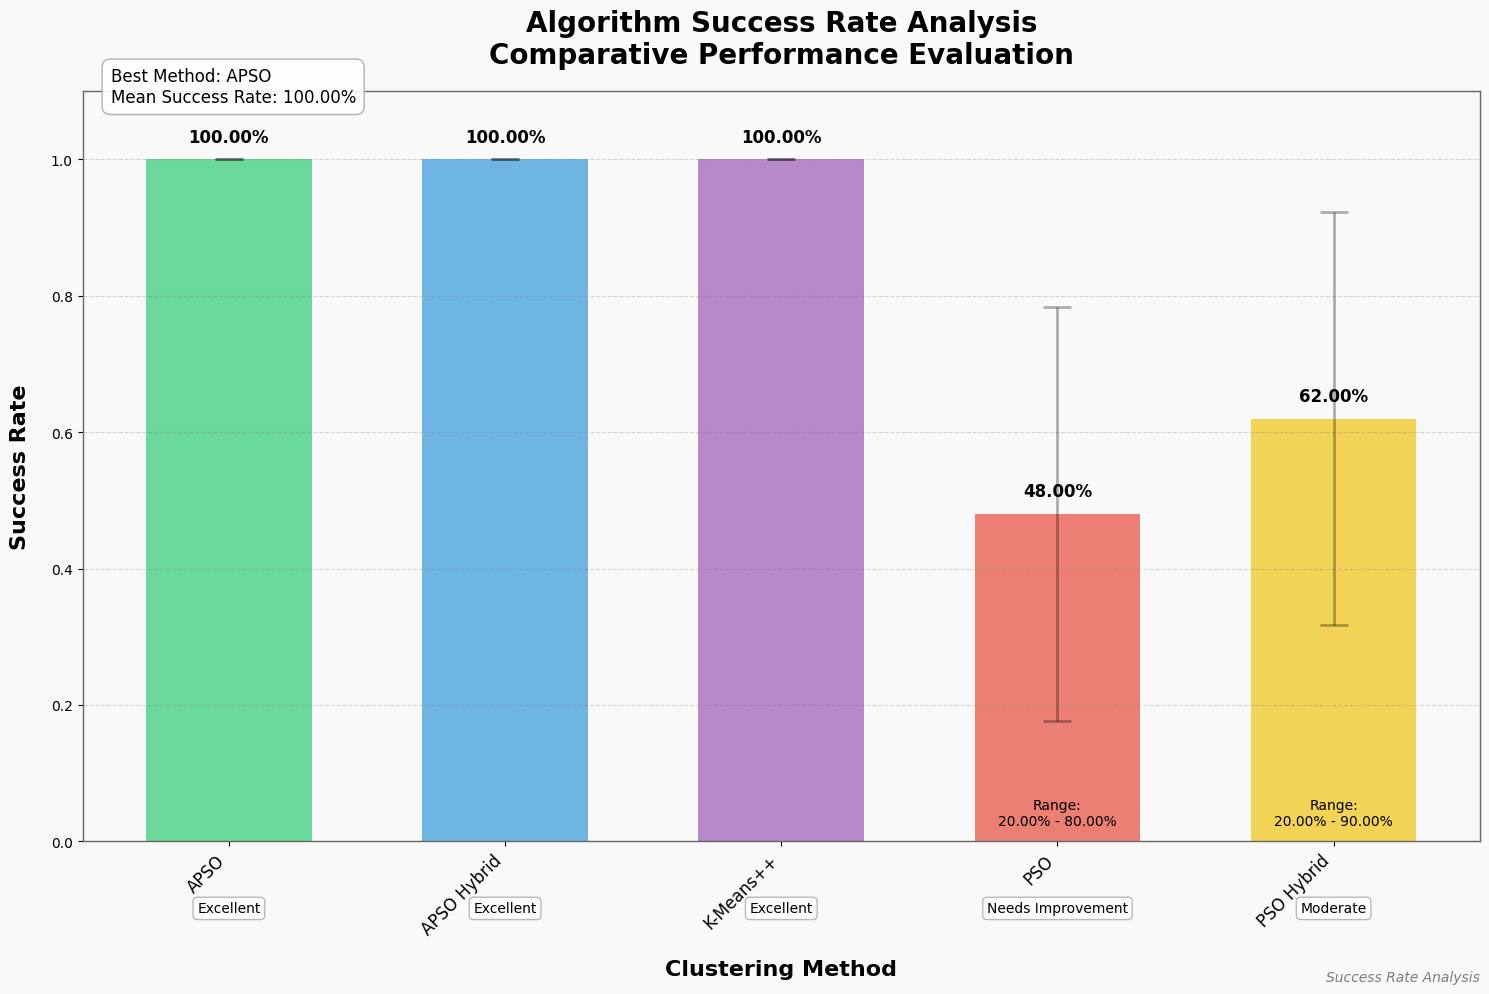


Detailed Success Rate Statistics:
             Mean Rate  Std Dev  Min Rate  Max Rate
Method                                             
APSO              1.00    0.000       1.0       1.0
APSO Hybrid       1.00    0.000       1.0       1.0
K-Means++         1.00    0.000       1.0       1.0
PSO               0.48    0.303       0.2       0.8
PSO Hybrid        0.62    0.303       0.2       0.9

Success Rate Categories:
APSO            | Rate: 100.00% | Category: Excellent
APSO Hybrid     | Rate: 100.00% | Category: Excellent
K-Means++       | Rate: 100.00% | Category: Excellent
PSO             | Rate: 48.00% | Category: Needs Improvement
PSO Hybrid      | Rate: 62.00% | Category: Moderate


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate success rate statistics
success_stats = df.groupby('Method').agg({
    'Success_Rate': ['mean', 'std', 'min', 'max']
}).round(4)

# Create figure with a higher resolution
plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()

# Set style elements
background_color = '#f9f9f9'
bar_colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create main bar plot with gradient colors
bars = plt.bar(range(len(success_stats)),
               success_stats['Success_Rate']['mean'],
               color=bar_colors,
               alpha=0.7,
               width=0.6)

# Add error bars
plt.errorbar(range(len(success_stats)),
            success_stats['Success_Rate']['mean'],
            yerr=success_stats['Success_Rate']['std'],
            fmt='none',
            color='black',
            capsize=10,
            capthick=2,
            elinewidth=2,
            alpha=0.3)

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

# Enhance plot appearance
plt.title('Algorithm Success Rate Analysis\nComparative Performance Evaluation',
         fontsize=20,
         pad=20,
         fontweight='bold')
plt.xlabel('Clustering Method', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Success Rate', fontsize=16, fontweight='bold', labelpad=15)

# Customize axis
plt.xticks(range(len(success_stats)),
           success_stats.index,
           rotation=45,
           ha='right',
           fontsize=12)
plt.ylim(0, 1.1)  # Set y-axis limit to 110% for better visualization

# Add value labels on top of bars
for idx, bar in enumerate(bars):
    height = success_stats['Success_Rate']['mean'][idx]
    plt.text(bar.get_x() + bar.get_width()/2.,
             height + 0.02,
             f'{height:.2%}',
             ha='center',
             va='bottom',
             fontsize=12,
             fontweight='bold')

# Add min-max range labels
for idx, (_, row) in enumerate(success_stats.iterrows()):
    min_val = row['Success_Rate']['min']
    max_val = row['Success_Rate']['max']
    if min_val != max_val:
        plt.text(idx, 0.02,
                f'Range:\n{min_val:.2%} - {max_val:.2%}',
                ha='center',
                va='bottom',
                fontsize=10)

# Add statistical information box
stats_text = (f"Best Method: {success_stats['Success_Rate']['mean'].idxmax()}\n"
             f"Mean Success Rate: {success_stats['Success_Rate']['mean'].max():.2%}")
plt.text(0.02, 0.98, stats_text,
         transform=ax.transAxes,
         fontsize=12,
         verticalalignment='bottom',
         bbox=dict(facecolor='white',
                  edgecolor='darkgray',
                  alpha=0.9,
                  boxstyle='round,pad=0.5'))

# Add success rate categories
def get_success_category(rate):
    if rate >= 0.9: return 'Excellent'
    elif rate >= 0.7: return 'Good'
    elif rate >= 0.5: return 'Moderate'
    else: return 'Needs Improvement'

for idx, rate in enumerate(success_stats['Success_Rate']['mean']):
    category = get_success_category(rate)
    plt.text(idx, -0.08,
             f'{category}',
             ha='center',
             va='top',
             transform=ax.get_xaxis_transform(),
             fontsize=10,
             bbox=dict(facecolor='white',
                      edgecolor='darkgray',
                      alpha=0.8,
                      boxstyle='round,pad=0.3'))

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(1.0)

# Add a subtle footer
plt.figtext(0.99, 0.01, 'Success Rate Analysis',
            ha='right',
            va='bottom',
            fontsize=10,
            style='italic',
            alpha=0.5)

# Adjust layout
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Success Rate Statistics:")
print("================================")
stats_df = success_stats.round(4)
stats_df.columns = ['Mean Rate', 'Std Dev', 'Min Rate', 'Max Rate']
print(stats_df.to_string())

# Print categorical analysis
print("\nSuccess Rate Categories:")
print("======================")
for method in success_stats.index:
    rate = success_stats.loc[method, ('Success_Rate', 'mean')]
    category = get_success_category(rate)
    print(f"{method:15} | Rate: {rate:6.2%} | Category: {category}")

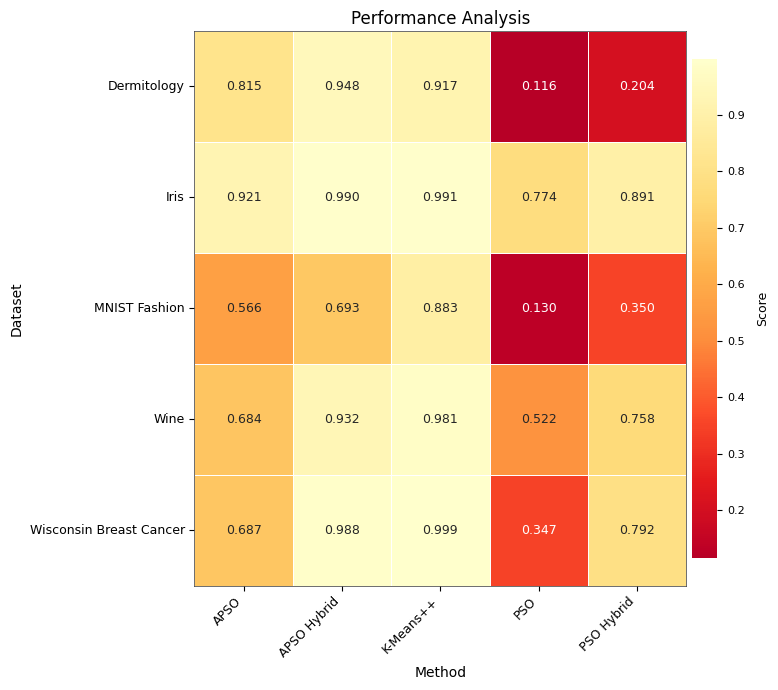


Best Method by Dataset:
                Dataset      Method  Final_Score
            Dermitology APSO Hybrid        0.948
                   Iris   K-Means++        0.991
          MNIST Fashion   K-Means++        0.883
                   Wine   K-Means++        0.981
Wisconsin Breast Cancer   K-Means++        0.999


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with smaller dimensions
plt.figure(figsize=(8, 7), dpi=100)

# Prepare the data
pivot_data = df.pivot(index='Dataset', columns='Method', values='Final_Score')

# Create the heatmap with tight styling
ax = sns.heatmap(pivot_data,
                 annot=True,
                 fmt='.3f',
                 cmap='YlOrRd_r',
                 center=0.5,
                 cbar_kws={'label': 'Score',
                          'orientation': 'vertical',
                          'pad': 0.01,
                          'shrink': 0.9},
                 square=False,  # Allow slight rectangle for better fit
                 linewidths=0.5,
                 linecolor='white',
                 annot_kws={'fontsize': 9,
                           'weight': 'normal'})

# Compact title
plt.title('Performance Analysis',
         fontsize=12,
         pad=5)

# Tight label styling
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Slim colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.set_label('Score', fontsize=9, labelpad=8)

# Minimal border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('#333333')

# Very tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print concise statistics
print("\nBest Method by Dataset:")
best_methods = df.loc[df.groupby('Dataset')['Final_Score'].idxmax()][['Dataset', 'Method', 'Final_Score']]
print(best_methods.to_string(index=False))

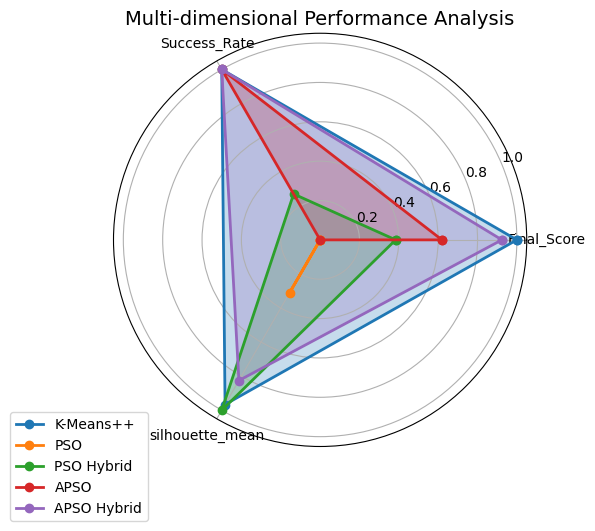

In [7]:
# Prepare data for radar plot
methods = df['Method'].unique()
metrics = ['Final_Score', 'Success_Rate', 'silhouette_mean']

radar_data = []
for method in methods:
    method_data = df[df['Method'] == method][metrics].mean()
    radar_data.append([method] + list(method_data))

radar_df = pd.DataFrame(radar_data, columns=['Method'] + metrics)

# Normalize the metrics
for metric in metrics:
    radar_df[metric] = (radar_df[metric] - radar_df[metric].min()) / (radar_df[metric].max() - radar_df[metric].min())

# Create radar plot
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(projection='polar'))
for idx, row in radar_df.iterrows():
    values = row[metrics].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Method'])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('Multi-dimensional Performance Analysis', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()

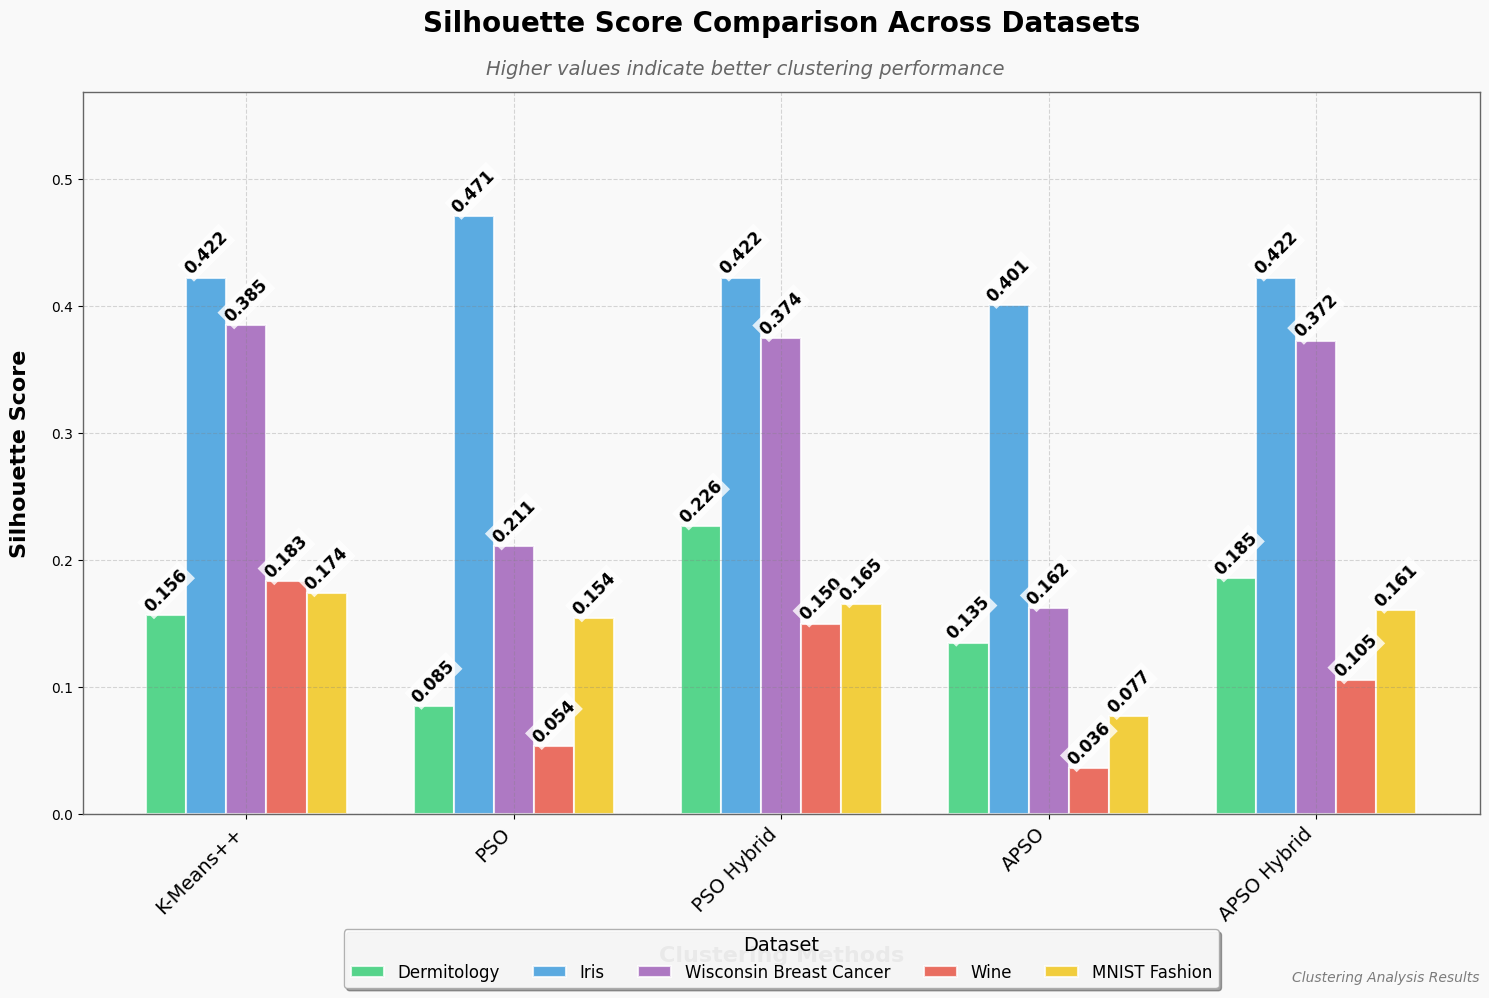


Detailed Silhouette Score Analysis:

Performance by Method (Sorted by Mean Score):
              mean    std    min    max
Method                                 
PSO Hybrid   0.268  0.124  0.150  0.422
K-Means++    0.264  0.128  0.157  0.422
APSO Hybrid  0.249  0.139  0.105  0.422
PSO          0.195  0.166  0.054  0.471
APSO         0.162  0.142  0.036  0.401

Performance by Dataset:
                          mean    std    min    max
Dataset                                            
Dermitology              0.158  0.053  0.085  0.226
Iris                     0.428  0.026  0.401  0.471
MNIST Fashion            0.146  0.039  0.077  0.174
Wine                     0.106  0.062  0.036  0.183
Wisconsin Breast Cancer  0.301  0.106  0.162  0.385

Performance Analysis:
Best Performance: PSO on Iris (0.4708)
Worst Performance: APSO on Wine (0.0361)
Relative Improvement: 1202.86%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure style and size
plt.figure(figsize=(15, 10))
plt.style.use('default')

# Keep your original colors
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
background_color = '#f9f9f9'

# Set background color
ax = plt.gca()
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create grouped bar chart
datasets = df['Dataset'].unique()
methods = df['Method'].unique()
x = np.arange(len(methods))
width = 0.15

# Plot bars for each dataset with enhanced styling
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    bars = plt.bar(x + i*width, 
                  dataset_data['silhouette_mean'],
                  width, 
                  label=dataset,
                  color=colors[i],
                  alpha=0.8,
                  edgecolor='white',
                  linewidth=1.5)

# Customize plot with enhanced styling
plt.title('Silhouette Score Comparison Across Datasets\n', 
         fontsize=20, 
         pad=20,
         fontweight='bold')

# Add subtitle
plt.figtext(0.5, 0.92, 
            'Higher values indicate better clustering performance',
            ha='center',
            fontsize=14,
            style='italic',
            color='#666666')

# Enhance axis labels
plt.xlabel('Clustering Methods', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Silhouette Score', fontsize=16, fontweight='bold', labelpad=15)

# Set x-axis ticks with enhanced styling
plt.xticks(x + width * (len(datasets)-1)/2, 
           methods, 
           rotation=45, 
           ha='right',
           fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

# Enhance legend
legend = plt.legend(title='Dataset',
                   title_fontsize=14,
                   fontsize=12,
                   bbox_to_anchor=(0.5, -0.2),
                   loc='center',
                   ncol=len(datasets),
                   borderaxespad=0.,
                   frameon=True,
                   edgecolor='darkgray',
                   facecolor='white',
                   shadow=True)
legend.get_frame().set_alpha(0.9)

# Add value labels on top of bars with enhanced visibility
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    for j, value in enumerate(dataset_data['silhouette_mean']):
        plt.text(j + i*width, value, f'{value:.3f}',
                ha='center',
                va='bottom',
                fontsize=12,
                rotation=45,
                bbox=dict(facecolor='white',
                         alpha=0.8,
                         edgecolor='none',
                         pad=2),
                weight='bold')

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(1.0)

# Set y-axis limits with more padding
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax * 1.15)

# Add subtle footer
plt.figtext(0.99, 0.01,
            'Clustering Analysis Results',
            ha='right',
            va='bottom',
            fontsize=10,
            style='italic',
            alpha=0.5)

# Adjust layout to accommodate the legend below
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.tight_layout()
plt.show()

# Print enhanced statistics
print("\nDetailed Silhouette Score Analysis:")
print("==================================")

# Calculate and format statistics by method
stats_by_method = df.groupby('Method')['silhouette_mean'].agg(['mean', 'std', 'min', 'max']).round(4)
stats_by_method = stats_by_method.sort_values('mean', ascending=False)

print("\nPerformance by Method (Sorted by Mean Score):")
print(stats_by_method)

# Calculate and format statistics by dataset
stats_by_dataset = df.groupby('Dataset')['silhouette_mean'].agg(['mean', 'std', 'min', 'max']).round(4)
print("\nPerformance by Dataset:")
print(stats_by_dataset)

# Performance analysis
best_idx = df['silhouette_mean'].idxmax()
worst_idx = df['silhouette_mean'].idxmin()

print(f"\nPerformance Analysis:")
print(f"Best Performance: {df.loc[best_idx, 'Method']} on {df.loc[best_idx, 'Dataset']} ({df.loc[best_idx, 'silhouette_mean']:.4f})")
print(f"Worst Performance: {df.loc[worst_idx, 'Method']} on {df.loc[worst_idx, 'Dataset']} ({df.loc[worst_idx, 'silhouette_mean']:.4f})")

# Calculate improvement percentage
improvement = (df.loc[best_idx, 'silhouette_mean'] - df.loc[worst_idx, 'silhouette_mean']) / df.loc[worst_idx, 'silhouette_mean'] * 100
print(f"Relative Improvement: {improvement:.2f}%")

In [9]:
import pandas as pd
import numpy as np

# Create comprehensive summary table
def create_summary_table(df):
    # Select and round relevant columns
    summary = df[['Dataset', 'Method', 'Success_Rate', 'silhouette_mean', 
                 'silhouette_percentile_75', 'silhouette_max']].copy()
    
    # Round numeric columns
    numeric_cols = ['Success_Rate', 'silhouette_mean', 'silhouette_percentile_75', 'silhouette_max']
    summary[numeric_cols] = summary[numeric_cols].round(4)
    
    # Rename columns
    summary.columns = ['Dataset', 'Method', 'Success Rate', 'Silhouette Mean', 
                      'Silhouette 75th', 'Silhouette Max']
    
    # Sort by Dataset and Success Rate
    summary = summary.sort_values(['Dataset', 'Success Rate', 'Silhouette Mean'], 
                                ascending=[True, False, False])
    
    return summary

# Create statistical summary by method
def create_method_stats(df):
    return df.groupby('Method').agg({
        'Success_Rate': ['mean', 'std'],
        'silhouette_mean': ['mean', 'std'],
        'silhouette_percentile_75': ['mean', 'std'],
        'silhouette_max': ['mean', 'std']
    }).round(4)

# Display tables
print("\nComprehensive Summary of Silhouette Scores and Success Rates:")
print("="*80)
summary_table = create_summary_table(df)
print(summary_table.to_string(index=False))




Comprehensive Summary of Silhouette Scores and Success Rates:
                Dataset      Method  Success Rate  Silhouette Mean  Silhouette 75th  Silhouette Max
            Dermitology APSO Hybrid           1.0            0.185            0.223           0.249
            Dermitology   K-Means++           1.0            0.157            0.180           0.190
            Dermitology        APSO           1.0            0.135            0.163           0.193
            Dermitology  PSO Hybrid           0.2            0.226            0.229           0.231
            Dermitology         PSO           0.2            0.085            0.086           0.086
                   Iris   K-Means++           1.0            0.422            0.422           0.422
                   Iris APSO Hybrid           1.0            0.422            0.422           0.422
                   Iris        APSO           1.0            0.401            0.421           0.495
                   Iris  PSO Hybrid  

In [10]:
print("\n\nStatistical Summary by Method:")
print("="*80)
method_stats = create_method_stats(df)
method_stats.columns = [f'{col[0]} ({col[1]})' for col in method_stats.columns]
method_stats



Statistical Summary by Method:


,Success_Rate (mean),Success_Rate (std),silhouette_mean (mean),silhouette_mean (std),silhouette_percentile_75 (mean),silhouette_percentile_75 (std),silhouette_max (mean),silhouette_max (std)
Method,,,,,,,,
APSO,1.00,0.000,0.162,0.142,0.216,0.160,0.256,0.168
APSO Hybrid,1.00,0.000,0.249,0.139,0.274,0.117,0.286,0.107
K-Means++,1.00,0.000,0.264,0.128,0.273,0.120,0.278,0.116
PSO,0.48,0.303,0.195,0.166,0.239,0.180,0.256,0.183
PSO Hybrid,0.62,0.303,0.268,0.124,0.277,0.115,0.280,0.113


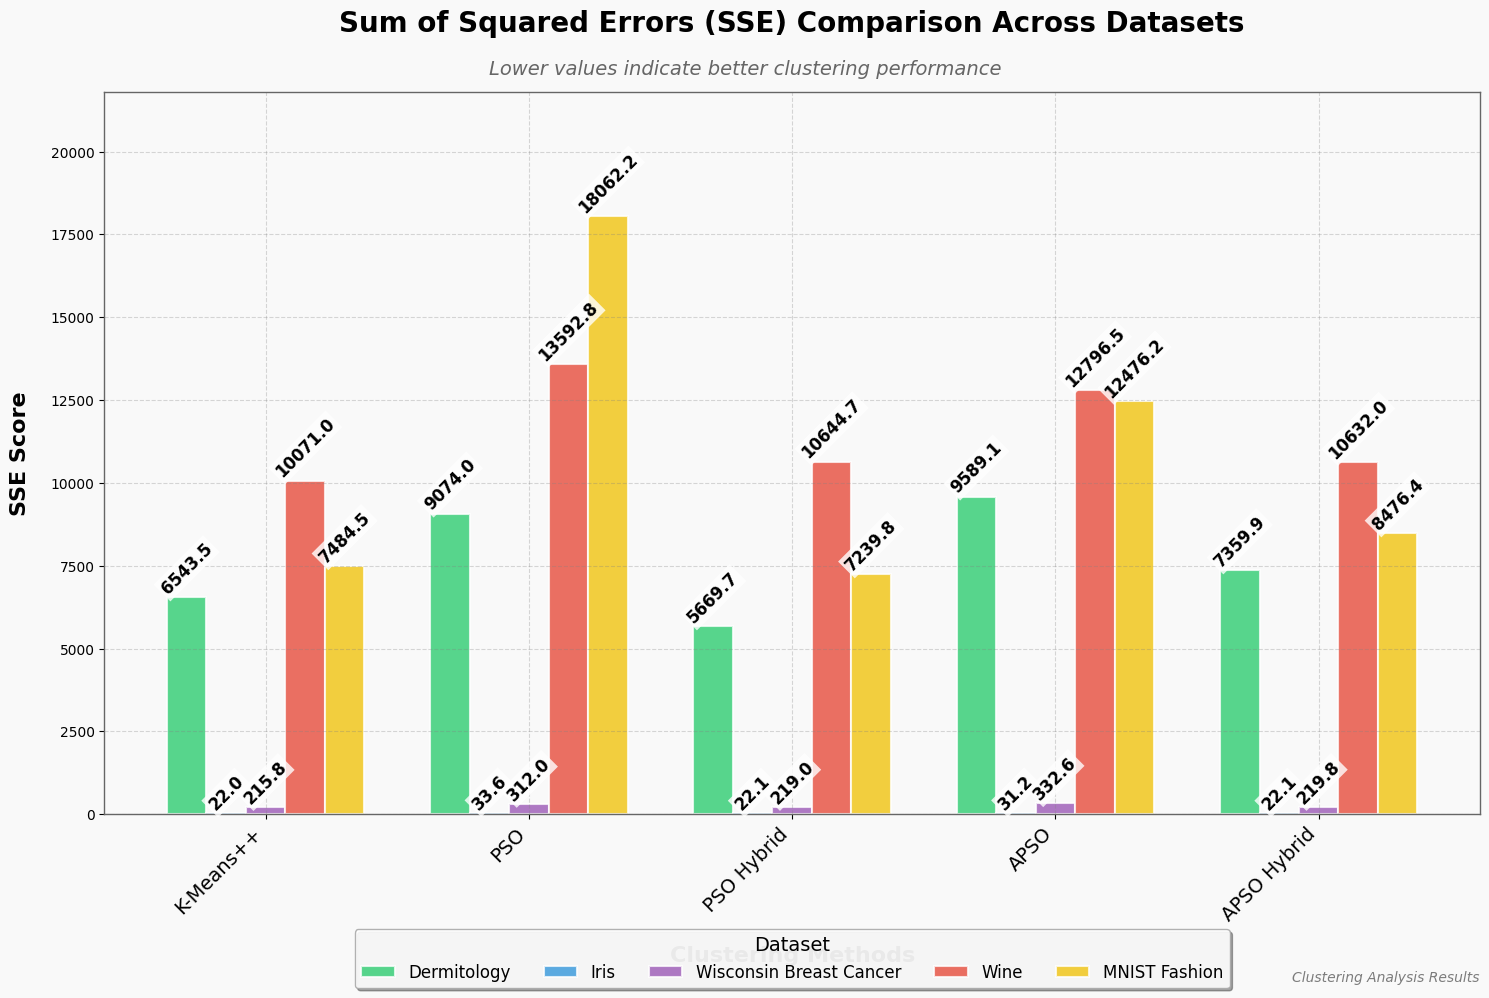


SSE Statistics by Method:
                mean      std    min       max
Method                                        
PSO Hybrid   4759.07  4600.97  22.08  10644.75
K-Means++    4867.38  4523.58  22.02  10071.03
APSO Hybrid  5342.04  4909.66  22.10  10631.98
APSO         7045.12  6389.45  31.21  12796.51
PSO          8214.91  8000.31  33.56  18062.20

SSE Statistics by Dataset:
                             mean      std       min       max
Dataset                                                       
Iris                        26.19     5.71     22.02     33.56
Wisconsin Breast Cancer    259.84    57.48    215.84    332.58
Dermitology               7647.26  1659.68   5669.68   9589.12
MNIST Fashion            10747.82  4598.98   7239.80  18062.20
Wine                     11547.41  1547.28  10071.03  13592.78


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure style and size
plt.figure(figsize=(15, 10))
plt.style.use('default')

# Keep your original colors
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
background_color = '#f9f9f9'

# Set background color
ax = plt.gca()
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create grouped bar chart
datasets = df['Dataset'].unique()
methods = df['Method'].unique()
x = np.arange(len(methods))
width = 0.15

# Plot bars for each dataset with enhanced styling
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    bars = plt.bar(x + i*width, 
                  dataset_data['sse_mean'],
                  width, 
                  label=dataset,
                  color=colors[i],
                  alpha=0.8,
                  edgecolor='white',
                  linewidth=1.5)

# Customize plot with enhanced styling
plt.title('Sum of Squared Errors (SSE) Comparison Across Datasets\n', 
         fontsize=20, 
         pad=20,
         fontweight='bold')

# Add subtitle
plt.figtext(0.5, 0.92, 
            'Lower values indicate better clustering performance',
            ha='center',
            fontsize=14,
            style='italic',
            color='#666666')

# Enhance axis labels
plt.xlabel('Clustering Methods', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('SSE Score', fontsize=16, fontweight='bold', labelpad=15)

# Set x-axis ticks with enhanced styling
plt.xticks(x + width * (len(datasets)-1)/2, 
           methods, 
           rotation=45, 
           ha='right',
           fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

# Enhance legend
legend = plt.legend(title='Dataset',
                   title_fontsize=14,
                   fontsize=12,
                   bbox_to_anchor=(0.5, -0.2),
                   loc='center',
                   ncol=len(datasets),
                   borderaxespad=0.,
                   frameon=True,
                   edgecolor='darkgray',
                   facecolor='white',
                   shadow=True)
legend.get_frame().set_alpha(0.9)

# Add value labels on top of bars with enhanced visibility
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    for j, value in enumerate(dataset_data['sse_mean']):
        plt.text(j + i*width, value, f'{value:.1f}',
                ha='center',
                va='bottom',
                fontsize=12,
                rotation=45,
                bbox=dict(facecolor='white',
                         alpha=0.8,
                         edgecolor='none',
                         pad=2),
                weight='bold')

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(1.0)

# Set y-axis limits with more padding
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax * 1.15)

# Add subtle footer
plt.figtext(0.99, 0.01,
            'Clustering Analysis Results',
            ha='right',
            va='bottom',
            fontsize=10,
            style='italic',
            alpha=0.5)

# Adjust layout to accommodate the legend below
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nSSE Statistics by Method:")
print("======================================")
method_stats = df.groupby('Method')['sse_mean'].agg(['mean', 'std', 'min', 'max']).round(2)
print(method_stats.sort_values('mean'))

print("\nSSE Statistics by Dataset:")
print("======================================")
dataset_stats = df.groupby('Dataset')['sse_mean'].agg(['mean', 'std', 'min', 'max']).round(2)
print(dataset_stats.sort_values('mean'))

In [12]:
import pandas as pd
import numpy as np

# Create comprehensive summary table for SSE
def create_sse_summary_table(df):
    # Select and round relevant columns
    summary = df[['Dataset', 'Method', 'Success_Rate', 'sse_mean', 
                 'sse_percentile_75', 'sse_max']].copy()
    
    # Round numeric columns
    numeric_cols = ['Success_Rate', 'sse_mean', 'sse_percentile_75', 'sse_max']
    summary[numeric_cols] = summary[numeric_cols].round(4)
    
    # Rename columns
    summary.columns = ['Dataset', 'Method', 'Success Rate', 'SSE Mean', 
                      'SSE 75th', 'SSE Max']
    
    # Sort by Dataset and SSE Mean (ascending because lower is better for SSE)
    summary = summary.sort_values(['Dataset', 'Success Rate', 'SSE Mean'], 
                                ascending=[True, False, True])
    
    return summary

# Create statistical summary by method for SSE
def create_sse_method_stats(df):
    return df.groupby('Method').agg({
        'Success_Rate': ['mean', 'std'],
        'sse_mean': ['mean', 'std'],
        'sse_percentile_75': ['mean', 'std'],
        'sse_max': ['mean', 'std']
    }).round(4)

# Display tables
print("\nComprehensive Summary of SSE Scores and Success Rates:")
print("="*80)
summary_table = create_sse_summary_table(df)
print(summary_table.to_string(index=False))


Comprehensive Summary of SSE Scores and Success Rates:
                Dataset      Method  Success Rate  SSE Mean  SSE 75th   SSE Max
            Dermitology   K-Means++           1.0  6543.525  6866.355  7104.027
            Dermitology APSO Hybrid           1.0  7359.942  6690.694 13029.099
            Dermitology        APSO           1.0  9589.117 10426.737 11572.883
            Dermitology  PSO Hybrid           0.2  5669.681  5710.933  5752.184
            Dermitology         PSO           0.2  9074.049  9254.562  9435.075
                   Iris   K-Means++           1.0    22.025    22.024    22.026
                   Iris APSO Hybrid           1.0    22.096    22.101    22.115
                   Iris        APSO           1.0    31.214    39.398    58.045
                   Iris  PSO Hybrid           0.9    22.079    22.087    22.104
                   Iris         PSO           0.8    33.557    40.157    42.567
          MNIST Fashion   K-Means++           1.0  7484.482  756

In [13]:
print("\n\nStatistical Summary by Method:")
print("="*80)
method_stats = create_sse_method_stats(df)
method_stats.columns = [f'{col[0]} ({col[1]})' for col in method_stats.columns]
method_stats.sort_values('sse_mean (mean)', ascending=True) # Sort by mean SSE, ascending since lower is better




Statistical Summary by Method:


,Success_Rate (mean),Success_Rate (std),sse_mean (mean),sse_mean (std),sse_percentile_75 (mean),sse_percentile_75 (std),sse_max (mean),sse_max (std)
Method,,,,,,,,
PSO Hybrid,0.62,0.303,4759.068,4600.965,5133.972,5191.605,5599.687,6003.347
K-Means++,1.00,0.000,4867.380,4523.576,4998.363,4638.542,5119.832,4733.028
APSO Hybrid,1.00,0.000,5342.041,4909.663,5262.499,5068.084,8154.856,7391.577
APSO,1.00,0.000,7045.123,6389.447,7488.511,6750.850,8297.084,7455.881
PSO,0.48,0.303,8214.914,8000.307,8821.919,9015.142,11552.958,11943.440


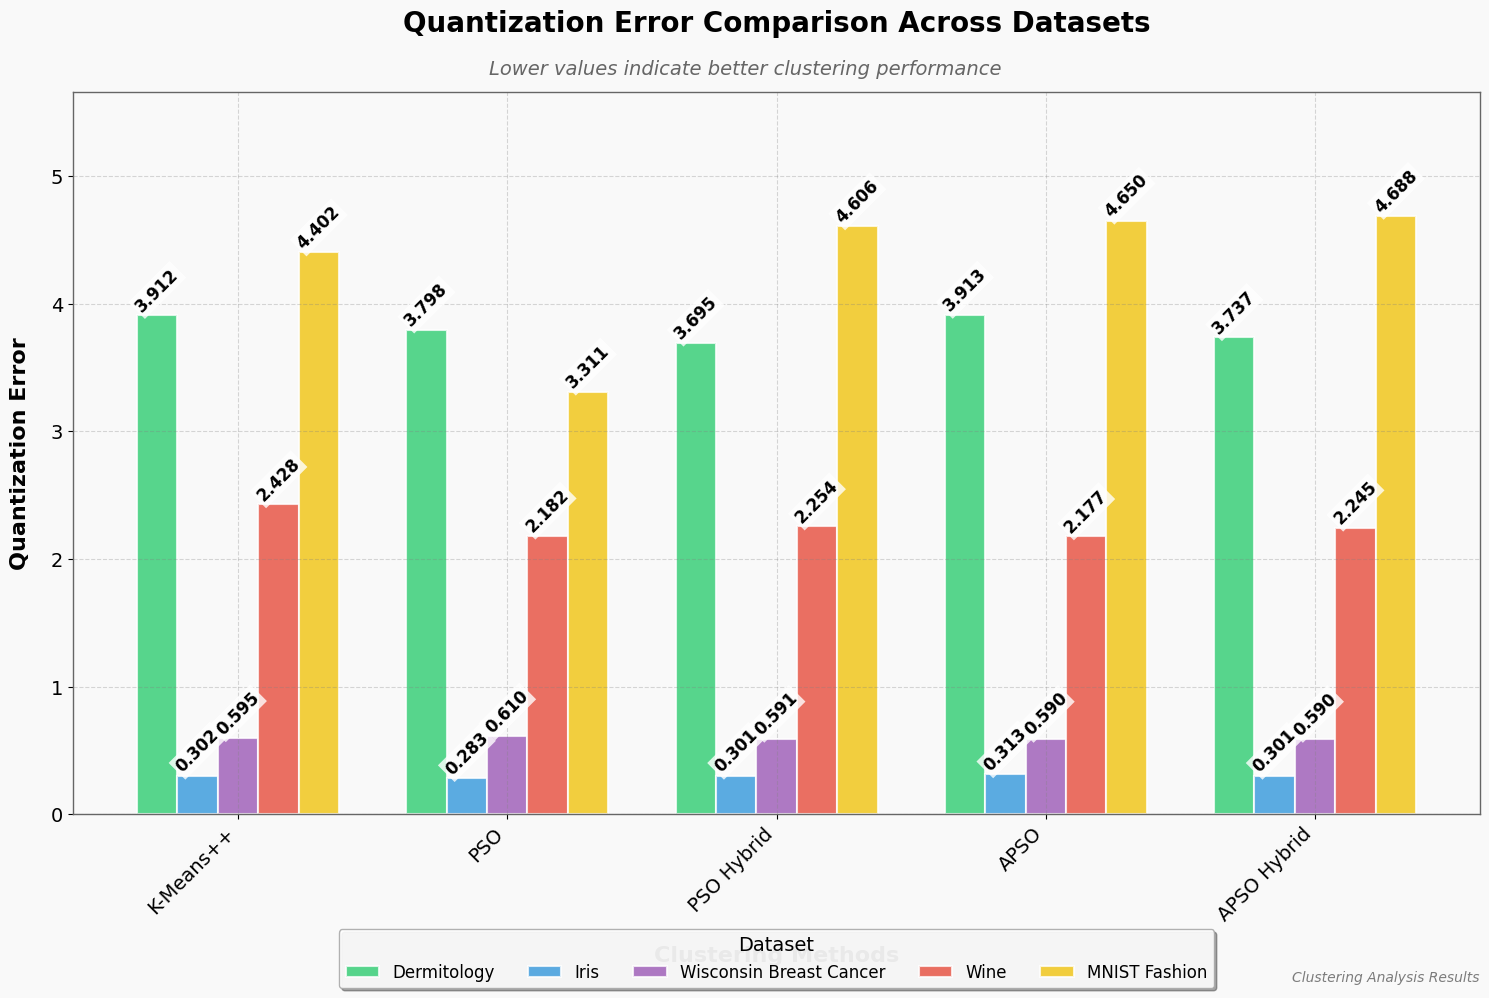


Quantization Error Statistics by Method:
              mean    std    min    max
Method                                 
PSO          2.037  1.570  0.283  3.798
PSO Hybrid   2.289  1.883  0.301  4.606
APSO Hybrid  2.312  1.917  0.301  4.688
K-Means++    2.328  1.866  0.302  4.402
APSO         2.329  1.937  0.313  4.651

Quantization Error Statistics by Dataset:
                          mean    std    min    max
Dataset                                            
Iris                     0.300  0.011  0.283  0.313
Wisconsin Breast Cancer  0.595  0.008  0.590  0.610
Wine                     2.257  0.102  2.177  2.428
Dermitology              3.811  0.099  3.695  3.913
MNIST Fashion            4.332  0.581  3.311  4.688


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure style and size
plt.figure(figsize=(15, 10))  # Made figure taller for better label visibility
plt.style.use('default')

# Keep your original colors
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
background_color = '#f9f9f9'

# Set background color
ax = plt.gca()
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create grouped bar chart
datasets = df['Dataset'].unique()
methods = df['Method'].unique()
x = np.arange(len(methods))
width = 0.15

# Plot bars with enhanced styling
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    bars = plt.bar(x + i*width, 
                  dataset_data['quantization_mean'],
                  width, 
                  label=dataset,
                  color=colors[i],
                  alpha=0.8,
                  edgecolor='white',
                  linewidth=1.5)

# Customize plot with enhanced styling
plt.title('Quantization Error Comparison Across Datasets\n', 
         fontsize=20,  # Increased font size
         pad=20,
         fontweight='bold')

# Add subtitle
plt.figtext(0.5, 0.92, 
            'Lower values indicate better clustering performance',
            ha='center',
            fontsize=14,  # Increased font size
            style='italic',
            color='#666666')

# Enhance axis labels with larger font
plt.xlabel('Clustering Methods', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Quantization Error', fontsize=16, fontweight='bold', labelpad=15)

# Set x-axis ticks with enhanced styling and larger font
plt.xticks(x + width * (len(datasets)-1)/2, 
           methods, 
           rotation=45, 
           ha='right',
           fontsize=14)  # Increased font size

# Increase y-axis tick label size
plt.yticks(fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3, color='gray')

# Move legend below the plot and make it horizontal
legend = plt.legend(title='Dataset',
                   title_fontsize=14,
                   fontsize=12,
                   bbox_to_anchor=(0.5, -0.2),  # Centered below plot
                   loc='center',
                   ncol=len(datasets),  # Spread datasets horizontally
                   borderaxespad=0.,
                   frameon=True,
                   edgecolor='darkgray',
                   facecolor='white',
                   shadow=True)
legend.get_frame().set_alpha(0.9)

# Add value labels with enhanced visibility and larger font
for i, dataset in enumerate(datasets):
    dataset_data = df[df['Dataset'] == dataset]
    for j, value in enumerate(dataset_data['quantization_mean']):
        plt.text(j + i*width, value, f'{value:.3f}',
                ha='center',
                va='bottom',
                fontsize=12,  # Increased font size
                rotation=45,  # Changed rotation for better readability
                bbox=dict(facecolor='white',
                         alpha=0.8,
                         edgecolor='none',
                         pad=2),  # Increased padding
                weight='bold')  # Made text bold

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(1.0)  # Increased line width

# Set y-axis limits with more padding
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax * 1.15)  # Increased padding for labels

# Add subtle footer
plt.figtext(0.99, 0.01,
            'Clustering Analysis Results',
            ha='right',
            va='bottom',
            fontsize=10,
            style='italic',
            alpha=0.5)

# Adjust layout to accommodate the legend below
plt.subplots_adjust(bottom=0.2)  # Make room for legend

# Show plot
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nQuantization Error Statistics by Method:")
print("======================================")
method_stats = df.groupby('Method')['quantization_mean'].agg(['mean', 'std', 'min', 'max']).round(4)
print(method_stats.sort_values('mean'))

print("\nQuantization Error Statistics by Dataset:")
print("======================================")
dataset_stats = df.groupby('Dataset')['quantization_mean'].agg(['mean', 'std', 'min', 'max']).round(4)
print(dataset_stats.sort_values('mean'))

In [15]:
import pandas as pd
import numpy as np

# Create comprehensive summary table for Quantization Error
def create_quantization_summary_table(df):
    # Select and round relevant columns
    summary = df[['Dataset', 'Method', 'Success_Rate', 'quantization_mean', 
                 'quantization_percentile_75', 'quantization_max']].copy()
    
    # Round numeric columns
    numeric_cols = ['Success_Rate', 'quantization_mean', 'quantization_percentile_75', 'quantization_max']
    summary[numeric_cols] = summary[numeric_cols].round(4)
    
    # Rename columns
    summary.columns = ['Dataset', 'Method', 'Success Rate', 'Quantization Mean', 
                      'Quantization 75th', 'Quantization Max']
    
    # Sort by Dataset and Quantization Mean (ascending because lower is better)
    summary = summary.sort_values(['Dataset', 'Success Rate', 'Quantization Mean'], 
                                ascending=[True, False, True])
    
    return summary

# Create statistical summary by method for Quantization Error
def create_quantization_method_stats(df):
    return df.groupby('Method').agg({
        'Success_Rate': ['mean', 'std'],
        'quantization_mean': ['mean', 'std'],
        'quantization_percentile_75': ['mean', 'std'],
        'quantization_max': ['mean', 'std']
    }).round(4)

# Display tables
print("\nComprehensive Summary of Quantization Error Scores and Success Rates:")
print("="*80)
summary_table = create_quantization_summary_table(df)
print(summary_table.to_string(index=False))


Comprehensive Summary of Quantization Error Scores and Success Rates:
                Dataset      Method  Success Rate  Quantization Mean  Quantization 75th  Quantization Max
            Dermitology APSO Hybrid           1.0              3.737              3.881             4.042
            Dermitology   K-Means++           1.0              3.912              3.926             4.015
            Dermitology        APSO           1.0              3.913              4.052             4.237
            Dermitology  PSO Hybrid           0.2              3.695              3.696             3.698
            Dermitology         PSO           0.2              3.798              3.853             3.908
                   Iris APSO Hybrid           1.0              0.301              0.301             0.301
                   Iris   K-Means++           1.0              0.302              0.302             0.302
                   Iris        APSO           1.0              0.313             

In [16]:
print("\n\nStatistical Summary by Method:")
print("="*80)
method_stats = create_quantization_method_stats(df)
method_stats.columns = [f'{col[0]} ({col[1]})' for col in method_stats.columns]
method_stats.sort_values('quantization_mean (mean)', ascending=True)



Statistical Summary by Method:


,Success_Rate (mean),Success_Rate (std),quantization_mean (mean),quantization_mean (std),quantization_percentile_75 (mean),quantization_percentile_75 (std),quantization_max (mean),quantization_max (std)
Method,,,,,,,,
PSO,0.48,0.303,2.037,1.570,2.224,1.756,2.396,1.979
PSO Hybrid,0.62,0.303,2.289,1.883,2.327,1.908,2.337,1.921
APSO Hybrid,1.00,0.000,2.312,1.917,2.373,1.966,2.460,2.058
K-Means++,1.00,0.000,2.328,1.866,2.363,1.888,2.459,2.018
APSO,1.00,0.000,2.329,1.937,2.391,1.998,2.464,2.064


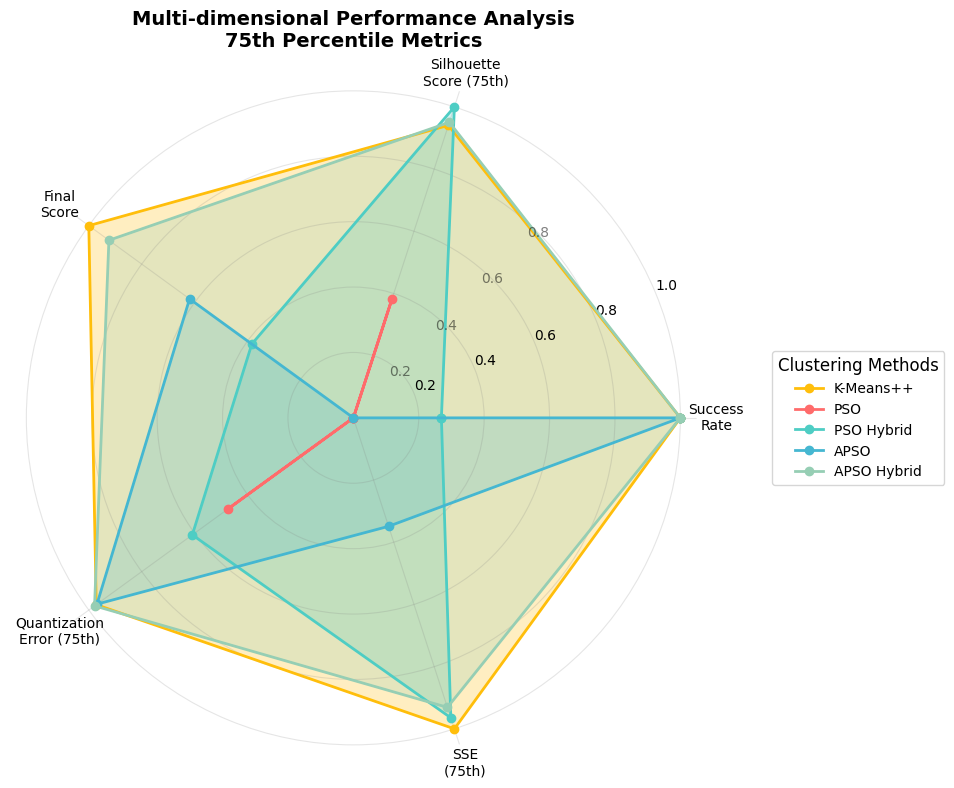

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for radar plot
methods = df['Method'].unique()
metrics = [
    'Success_Rate',
    'silhouette_percentile_75',
    'Final_Score',
    'quantization_percentile_75_normalized',  # Using normalized quantization
    'sse_percentile_75'
]

# Create radar data
radar_data = []
for method in methods:
    method_data = df[df['Method'] == method][metrics].mean()
    radar_data.append([method] + list(method_data))

radar_df = pd.DataFrame(radar_data, columns=['Method'] + metrics)

# Normalize the metrics (invert only for SSE as quantization is already normalized)
for metric in metrics:
    if metric == 'sse_percentile_75':  # Only invert SSE
        radar_df[metric] = 1 - (radar_df[metric] - radar_df[metric].min()) / (radar_df[metric].max() - radar_df[metric].min())
    elif metric not in ['quantization_percentile_75_normalized']:  # Skip already normalized metrics
        radar_df[metric] = (radar_df[metric] - radar_df[metric].min()) / (radar_df[metric].max() - radar_df[metric].min())

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

# Color scheme for different methods
colors = {
    'PSO': '#FF6B6B',
    'PSO Hybrid': '#4ECDC4',
    'APSO': '#45B7D1',
    'APSO Hybrid': '#96CEB4',
    'K-Means++': '#FFBE0B'
}

# Plot data
for idx, row in radar_df.iterrows():
    values = row[metrics].values
    values = np.concatenate((values, [values[0]]))
    method = row['Method']
    
    # Plot with custom styling
    ax.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[method])
    ax.fill(angles, values, alpha=0.25, color=colors[method])

# Customize the plot
ax.set_xticks(angles[:-1])
metric_labels = [
    'Success\nRate',
    'Silhouette\nScore (75th)',
    'Final\nScore',
    'Quantization\nError (75th)',
    'SSE\n(75th)'
]
ax.set_xticklabels(metric_labels, size=10)

# Add gridlines and adjust their style
ax.grid(True, color='gray', alpha=0.2)
ax.spines['polar'].set_visible(False)

# Add circles at specific values
circles = [0.2, 0.4, 0.6, 0.8]
for circle in circles:
    ax.text(np.pi/4, circle, f'{circle:.1f}', 
            ha='center', va='center', alpha=0.5)

# Set chart title
plt.title('Multi-dimensional Performance Analysis\n75th Percentile Metrics', 
          pad=20, size=14, weight='bold')

# Customize legend
plt.legend(loc='center left', 
          bbox_to_anchor=(1.1, 0.5),
          title='Clustering Methods',
          title_fontsize=12,
          fontsize=10)



# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Save the plot
plt.savefig('performance_radar_plot_normalized.png', dpi=300, bbox_inches='tight')

In [19]:
df.columns

Index(['Dataset', 'Method', 'Success_Rate', 'Final_Score', 'Rank',
       'silhouette_mean', 'silhouette_mean_penalized',
       'silhouette_percentile_75', 'silhouette_percentile_75_penalized',
       'silhouette_max', 'silhouette_max_penalized', 'calinski_harabasz_mean',
       'calinski_harabasz_mean_penalized', 'calinski_harabasz_percentile_75',
       'calinski_harabasz_percentile_75_penalized', 'calinski_harabasz_max',
       'calinski_harabasz_max_penalized', 'davies_bouldin_mean',
       'davies_bouldin_mean_penalized', 'davies_bouldin_percentile_75',
       'davies_bouldin_percentile_75_penalized', 'davies_bouldin_max',
       'davies_bouldin_max_penalized', 'sse_mean', 'sse_mean_penalized',
       'sse_percentile_75', 'sse_percentile_75_penalized', 'sse_max',
       'sse_max_penalized', 'quantization_mean', 'quantization_mean_penalized',
       'quantization_percentile_75', 'quantization_percentile_75_penalized',
       'quantization_max', 'quantization_max_penalized',
      